<a href="https://colab.research.google.com/github/AndreKlos/AndreKlos/blob/main/Machine_Learning_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cadeia de crédito e riscos

## Base da dados

In [46]:
!pip install 'scikit-learn == 1.0.2'

In [2]:
#Importando o pandas
import pandas as pd

#importando os dados
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)

#visualizando os dados
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


Visualizando mais informações sobre nossos dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

Verificando o tamanho do nosso banco de dados

In [4]:
#criando as variaveis de tamanho do DataFrame
linhas = dados.shape[0]
colunas = dados.shape[1]

#comunicando o tamanho
print('A base de dados tem %s linhas e %s colunas'%(linhas, colunas))


A base de dados tem 1000 linhas e 21 colunas


Verificando a existência de valores nulos ou duplicados

In [5]:
#Criando a variável de quanto número duplicados tem
duplicados = dados.duplicated().sum()

#comunicando o número de duplicados
print('A base de dados tem %s dados duplicados.'%(duplicados))

A base de dados tem 0 dados duplicados.


In [6]:
#criando a variável de quantos números nulos tem
nulos = dados.isnull().sum().sum()

#comunicando o número de nulos
print('Abase de dados tem %s dados nulos'%(nulos))

Abase de dados tem 0 dados nulos


# Regressão Logística

## Criando bases de treino e teste

In [7]:
#visualizando nossa base de dados
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


Separando a base de dados entre X (variáveis explicativas) e Y (variável alvo)

In [8]:
#criando as variáveis
y = dados['default']
x = dados.drop(columns = 'default')

In [9]:
#visualizando as novas variáveis
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [10]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

O nosso próximo passo é dividir essas variáveis em versões de treino e teste, para posterior uso no modelo de Machine Learning

In [11]:
#importando ferramenta do scikit
from sklearn.model_selection import train_test_split

#fazendo a separação
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,test_size = 0.30, random_state = SEED)

#visualizando o resultado
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print(f'A base de treino tem {base_treino} elementos e a base de teste tem {base_teste} elementos')

A base de treino tem 700 elementos e a base de teste tem 300 elementos


## Transformação de categorias

In [12]:
#importando o modelo de regressão logística
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter = 1000)



Transformando nossas variáveis para utiliza-las no modelo

In [13]:
#visualizando os dados
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [14]:
#visualizando as categorias da coluna conta corrente
dados['conta_corrente']. unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [15]:
#definindo dicionário para transformação
a = {'< 0 DM':1,
     '0 <= ... < 200 DM':2,
     'no checking account':3,
     '>= 200 DM / salary assignments for at least 1 year':4

}
#fazendo a transformação da coluna conta_corrente
dados['conta_corrente'] = dados['conta_corrente'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


Após o exemplo dado na aula, irei repetir o mesmo método para as demais variáveis categóricas.

In [16]:
import numpy as np

def aplicar_mapeamento(dataframe, colunas_para_mapear, mapeamento):
  for coluna in colunas_para_mapear:
    if coluna in mapeamento:
      dataframe[coluna] = dataframe[coluna].map(mapeamento[coluna])




colunas_para_mapear = ['historico_credito',
'proposito_emprestimo',
'reserva_cc',
'tempo_emprego_atual',
'sexo_est_civil',
'outros_fiadores',
'propriedade',
'outros_planos_financiamento',
'tipo_residencia',
'status_emprego',
'telefone',
'trabalhador_estrangeiro'
]
mapeamento = {'historico_credito': {'critical account/ other credits existing (not at this bank)': 5,
  'existing credits paid back duly till now': 3,
  'delay in paying off in the past': 4,
  'no credits taken/ all credits paid back duly': 1,
  'all credits at this bank paid back duly': 2},
 'proposito_emprestimo': {'domestic appliances': 5,
  '(vacation - does not exist?)': 8,
  'radio/television': 4,
  'car (new)': 1,
  'car (used)': 2,
  'business': 10,
  'repairs': 6,
  'education': 7,
  'furniture/equipment': 3,
  'retraining': 9},
 'reserva_cc': {'unknown/ no savings account': 1,
  '... < 100 DM': 5,
  '500 <= ... < 1000 DM ': 3,
  '.. >= 1000 DM ': 2,
  '100 <= ... < 500 DM': 4},
 'tempo_emprego_atual': {'.. >= 7 years': 1,
  '1 <= ... < 4 years': 3,
  '4 <= ... < 7 years': 2,
  'unemployed': 5,
  '... < 1 year ': 4},
 'sexo_est_civil': {'male : single': 3,
  'female : divorced/separated/married': 2,
  'male : divorced/separated': 1,
  'male : married/widowed': 4},
 'outros_fiadores': {'none': 1, 'guarantor': 3, 'co-applicant': 2},
 'propriedade': {'real estate': 1,
  'if not A121 : building society savings agreement/ life insurance': 2,
  'unknown / no property': 4,
  'if not A121/A122 : car or other, not in attribute 6': 3},
 'outros_planos_financiamento': {'none': 3, 'bank': 1, 'stores': 2},
 'tipo_residencia': {'own': 2, 'for free': 3, 'rent': 1},
 'status_emprego': {'skilled employee / official': 3,
  'unskilled - resident': 2,
  'management/ self-employed/ highly qualified employee/ officer': 4,
  'unemployed/ unskilled - non-resident': 1},
 'telefone': {'yes, registered under the customers name ': 1, 'none': 0},
 'trabalhador_estrangeiro': {'yes': 1, 'no': 0}}

aplicar_mapeamento(dados, colunas_para_mapear, mapeamento)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,3,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


## Primeira regressão logística

In [17]:
#fazendo a divisão da base de dados nova
y = dados['default']
x = dados.drop(columns = 'default')


In [18]:
#fazendo a divisão entre treino e teste

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.3, random_state = SEED)

#visualizando novamente
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print(f'A base de treino tem {base_treino} elementos e a base de teste tem {base_teste} elementos')

A base de treino tem 700 elementos e a base de teste tem 300 elementos


In [19]:
# fazendo a aplicação do modelo
modelo.fit(treino_x, treino_y)

#visualizando o score do modelo
print(modelo.score(treino_x, treino_y))

0.74


# Métricas estatísticas

## Acurácia de teste

In [20]:
#Calculando a acurácia
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
#importando função para calculo
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia,3)*100
acuracia

78.3

## Plotando a matriz de confusão


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


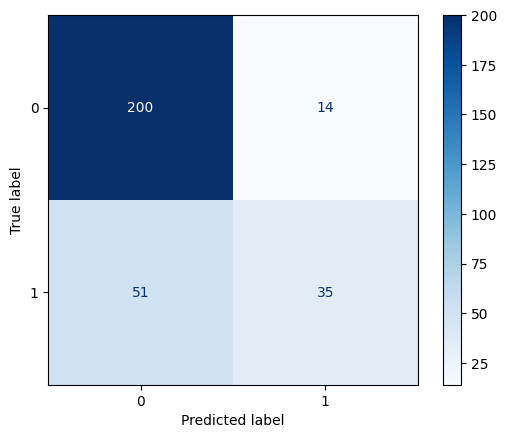

In [22]:
#importando as funções
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#definindo a matriz
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap = 'Blues',
                                        values_format = '.3g')
matriz_confusao

## Classification report

In [23]:
#Importando a função Classification report
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       214
           1       0.71      0.41      0.52        86

    accuracy                           0.78       300
   macro avg       0.76      0.67      0.69       300
weighted avg       0.77      0.78      0.76       300



## Plotando a curva ROC


In [24]:
# importando as função usadas
from sklearn.metrics import roc_curve, roc_auc_score

In [25]:
# fazendo a probabilidade de previsão do modelo
prob_previsao = modelo.predict_proba(teste_x)[:,1]
prob_previsao

array([0.11551787, 0.40598974, 0.33301516, 0.61427535, 0.28275869,
       0.07362379, 0.70576043, 0.45109068, 0.30620744, 0.35910357,
       0.11440577, 0.13910692, 0.10846888, 0.13273694, 0.4599429 ,
       0.38273859, 0.12384006, 0.13509646, 0.14176796, 0.317772  ,
       0.19344086, 0.34654386, 0.31868006, 0.4125783 , 0.25523833,
       0.1327297 , 0.14074447, 0.45460414, 0.20646638, 0.05956993,
       0.29039575, 0.19587821, 0.26451915, 0.04579406, 0.22775842,
       0.20549388, 0.08653021, 0.63131679, 0.23836784, 0.08221665,
       0.45959743, 0.11479009, 0.21562086, 0.67936677, 0.85977017,
       0.22613223, 0.32468759, 0.2679448 , 0.46586374, 0.15524948,
       0.12437275, 0.14615785, 0.70516223, 0.06228108, 0.15133626,
       0.31684755, 0.21746582, 0.47859389, 0.70268169, 0.86837848,
       0.09814889, 0.04895787, 0.05671726, 0.29826536, 0.29321275,
       0.44840871, 0.88786478, 0.50550947, 0.75921469, 0.37378452,
       0.46470822, 0.18064757, 0.6803209 , 0.13920009, 0.10673

In [26]:
# definindo as variaveis necessárias para plotar a curva
# tfp = taxa de falsos positivos
# tvp = taxa de verdadeiros positivos
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
#visualizando a area sob a curva roc, calculada por integral
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.8019452292979787


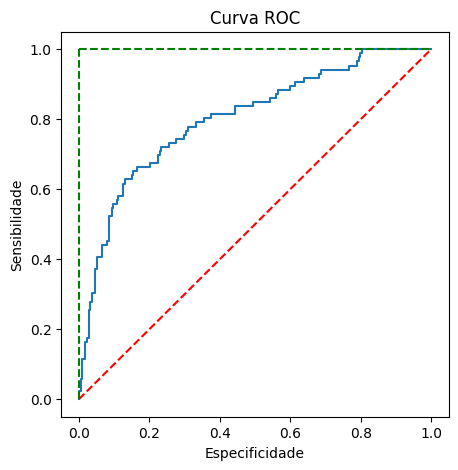

In [27]:
#plotando a curva

plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')

plt.plot([0,1], ls = '--', c = 'red') #plotando linha guiada vermelha
plt.plot([0,0], [1,0], ls = '--', c = 'green')
plt.plot([1,1], ls = '--', c= 'green') #plotando linha guia pontilhada verde
plt.show()

#area auc >0.8, então discriminação excelente!

# Análise e visualização de dados

## Análise descritiva


In [28]:
#definindo as variaveis de analise
variaveis_analise = ['sexo_est_civil','idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']

#aplicando o describe
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.68200,35.546000,20.903000,3271.258000,0.300000
std,0.70808,11.375469,12.058814,2822.736876,0.458487
min,1.00000,19.000000,4.000000,250.000000,0.000000
25%,2.00000,27.000000,12.000000,1365.500000,0.000000
50%,3.00000,33.000000,18.000000,2319.500000,0.000000
75%,3.00000,42.000000,24.000000,3972.250000,1.000000
max,4.00000,75.000000,72.000000,18424.000000,1.000000


Não é possível ter informações relevantes avaliando sexo_est_civil ou default, já que elas são categoricas e binárias, respectivamente.

In [29]:
#homem = categorias 1, 2, 3
#mulher = categoria 2

dados['sexo_est_civil'].value_counts()

3    548
2    310
4     92
1     50
Name: sexo_est_civil, dtype: int64

Temos 310 mulheres e 690 homens

In [30]:
#para avaliar a variável default

dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

temos 700 individuos com crédito negado e 300 com crédito concedido, indicando que nossa base de dados é desbalanceada

##Histogramas

In [31]:
#importando o seaborn
import seaborn as sns


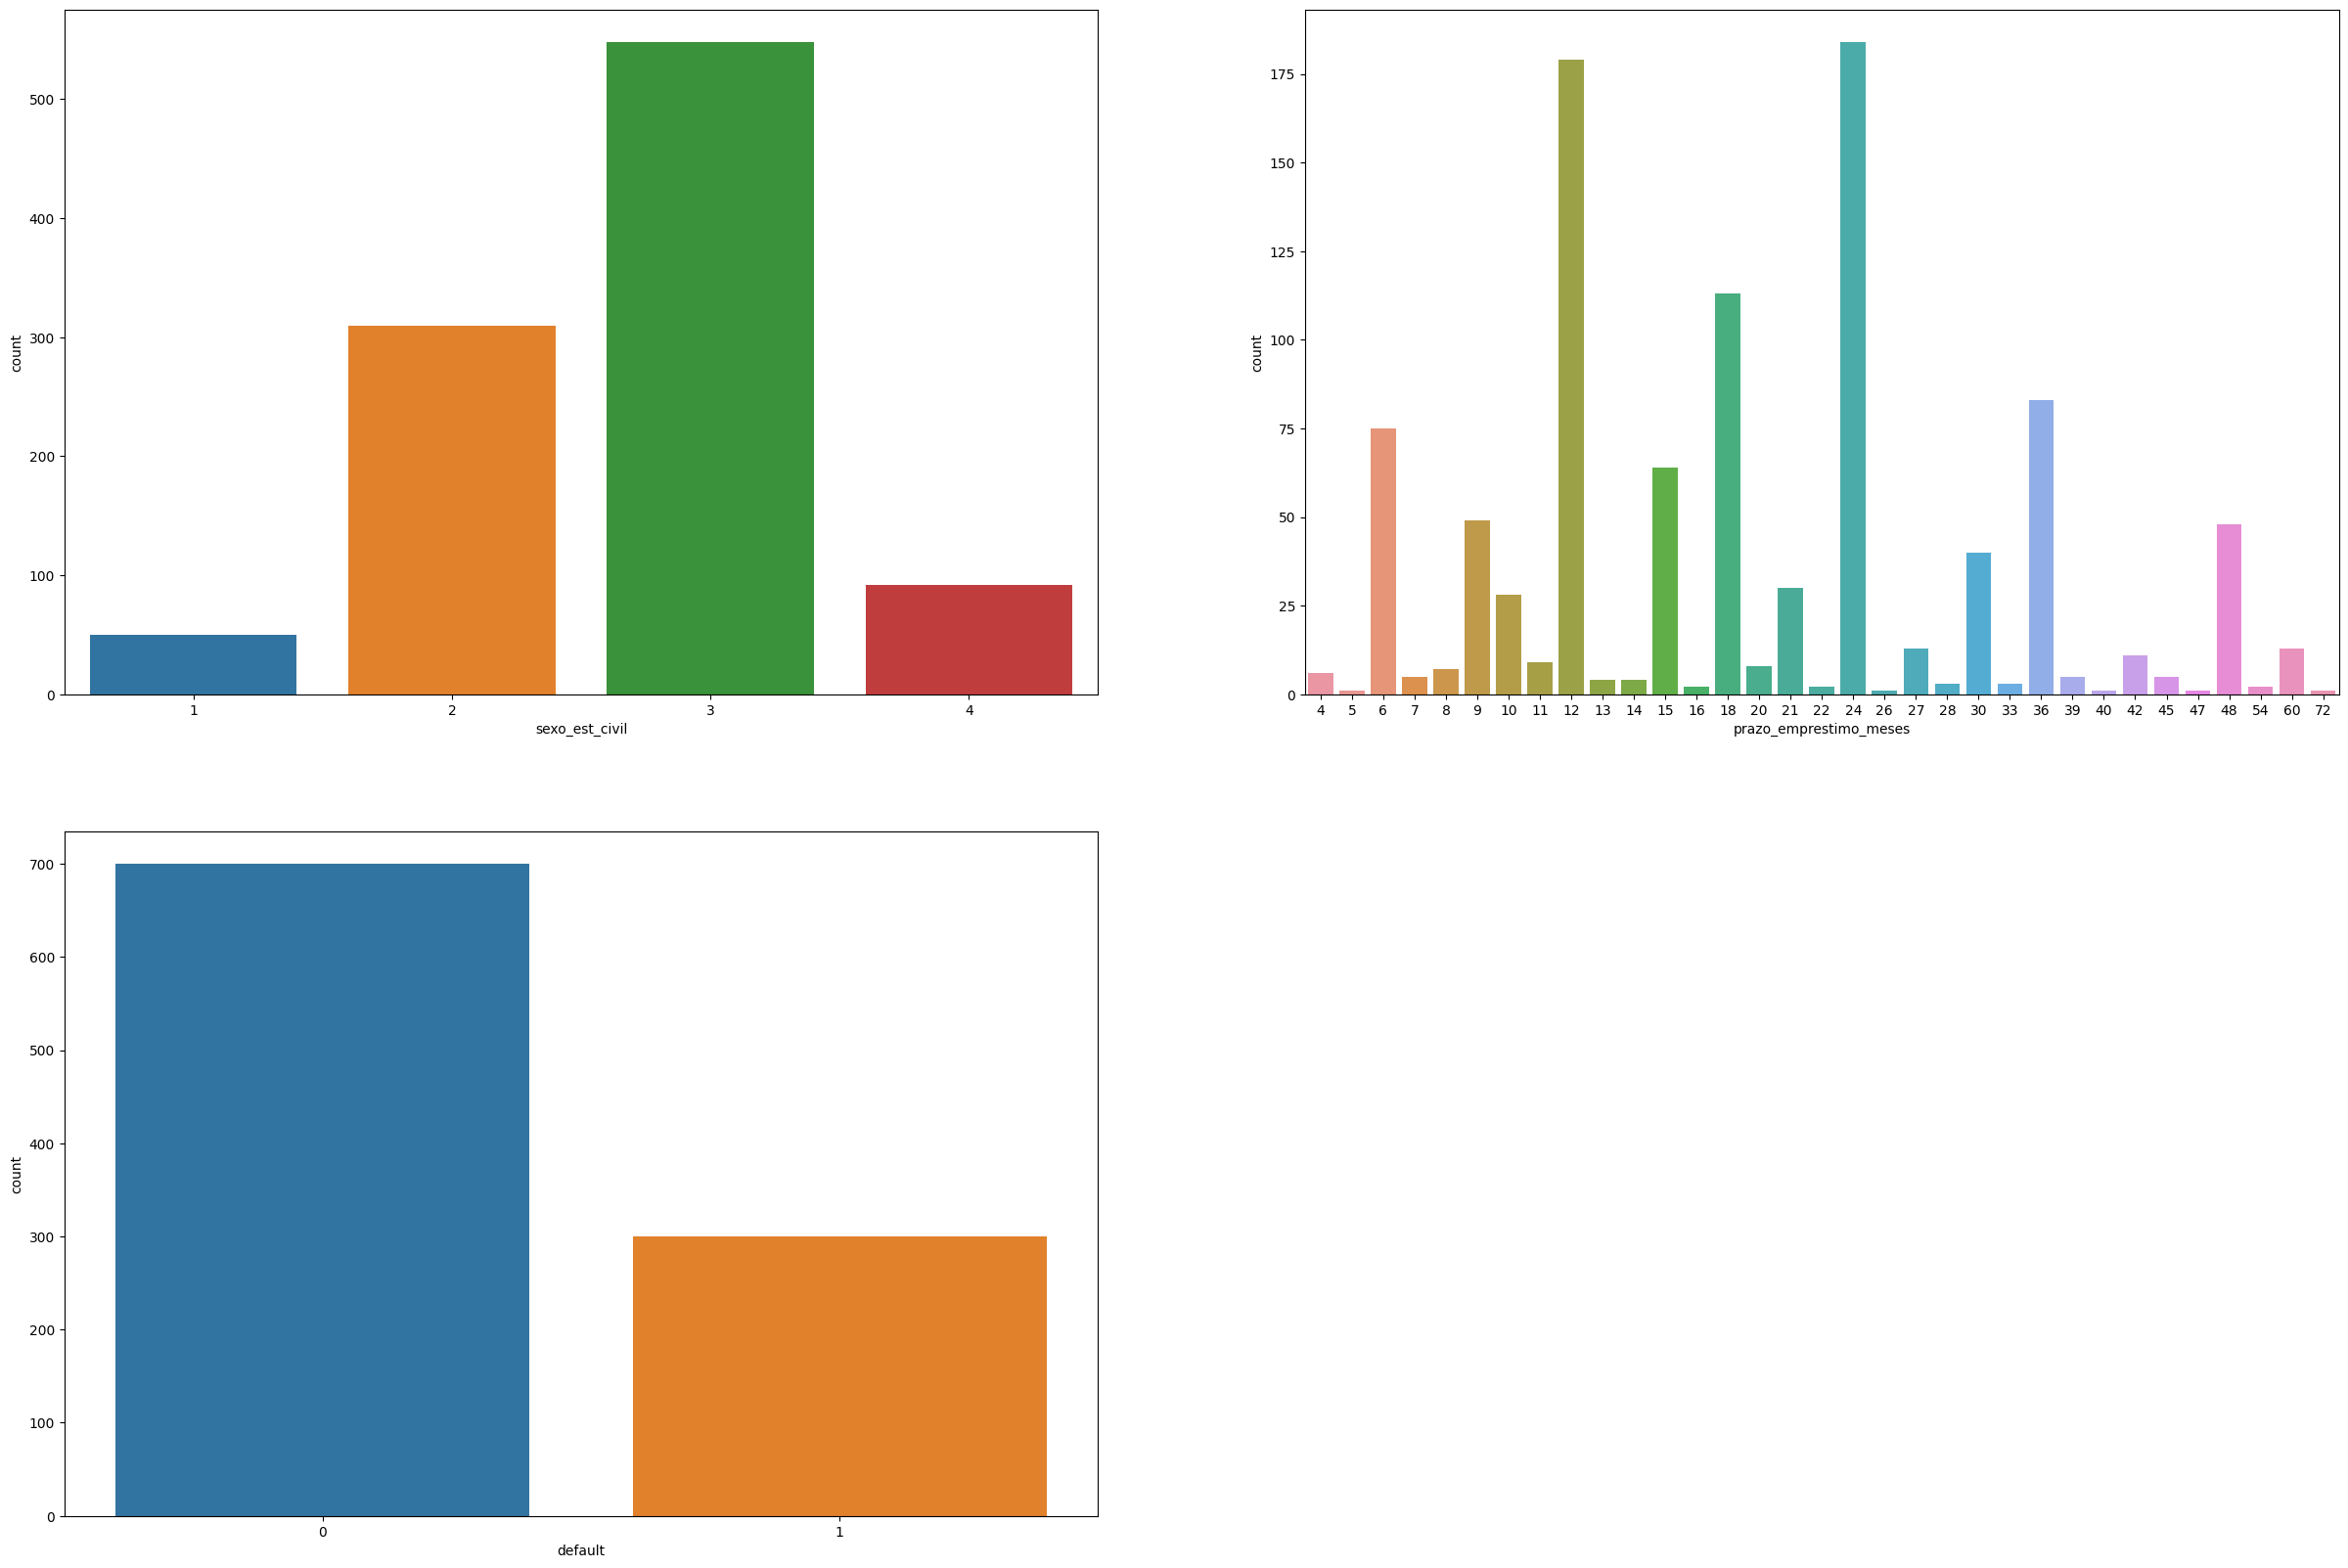

In [32]:
#criando o histograma de algumas variáveis
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))
plt.figure(figsize = (30,20))
for i in lista_histogramas:
  plt.subplot(2,2, i[0]+1)
  sns.countplot(x = i[1], data = dados)

##Boxplot e gráfico de barras

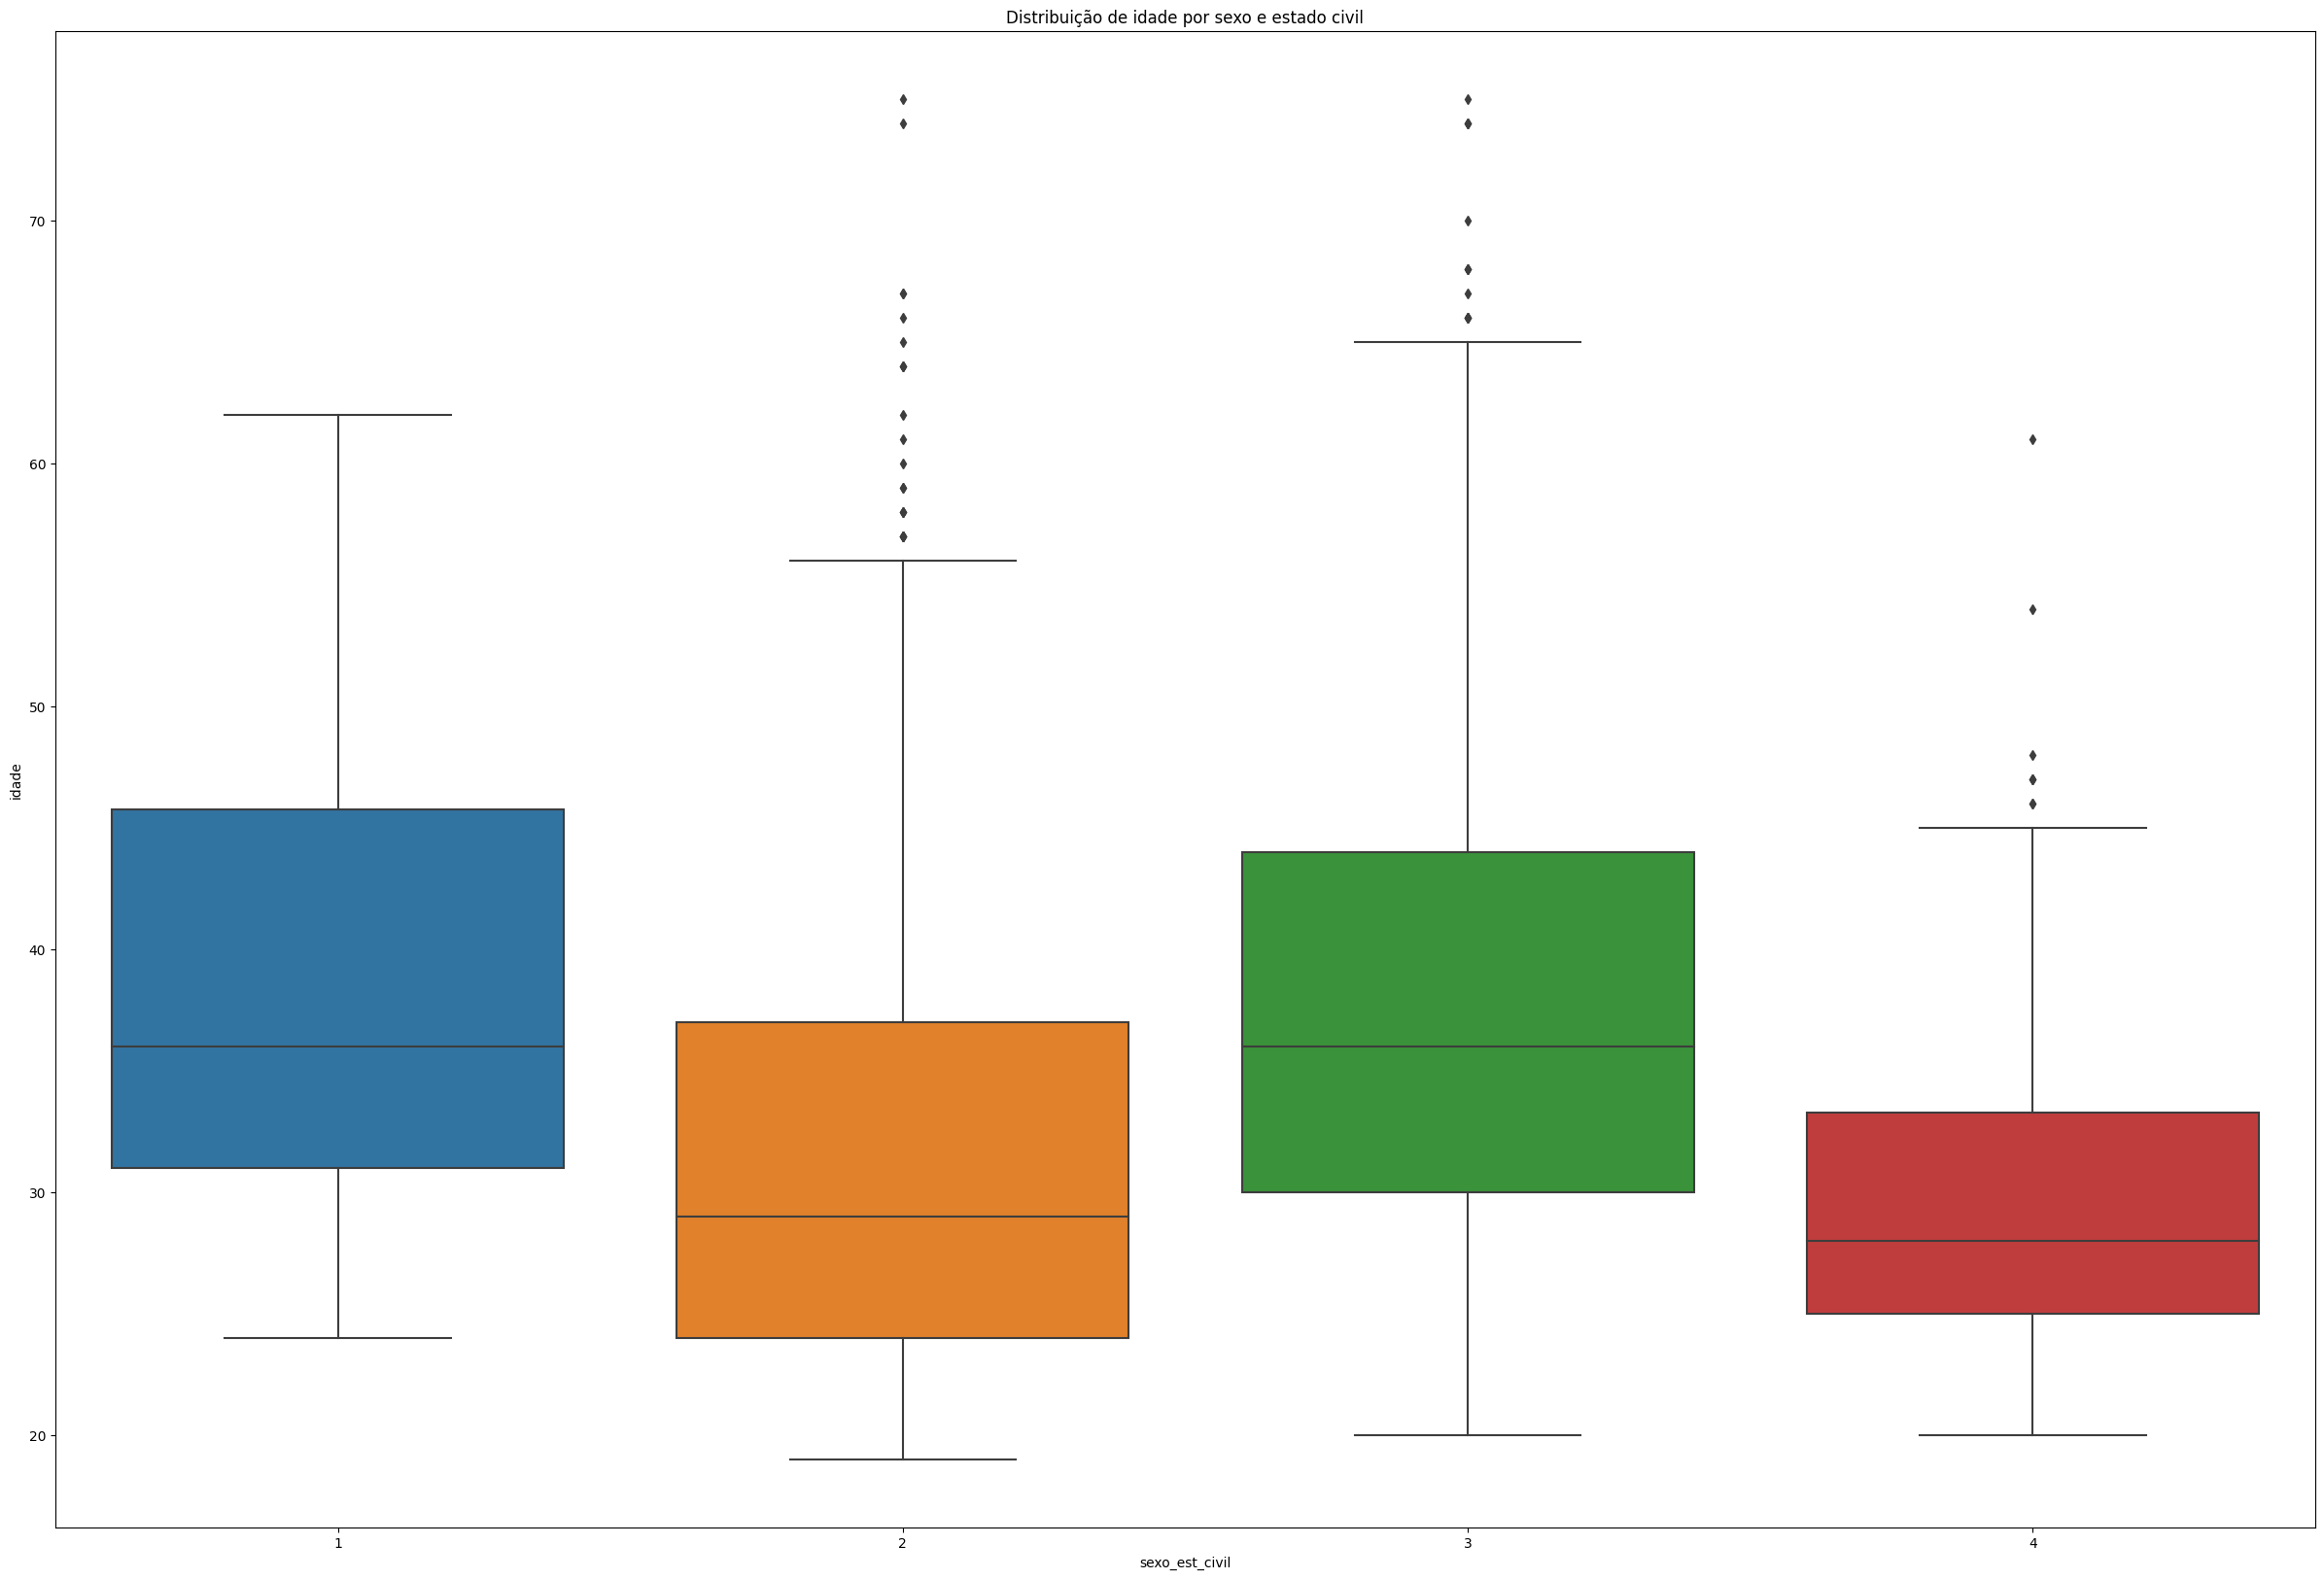

In [33]:
#criando o boxplot
plt.figure(figsize = (30,20))
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distribuição de idade por sexo e estado civil')
plt.show()

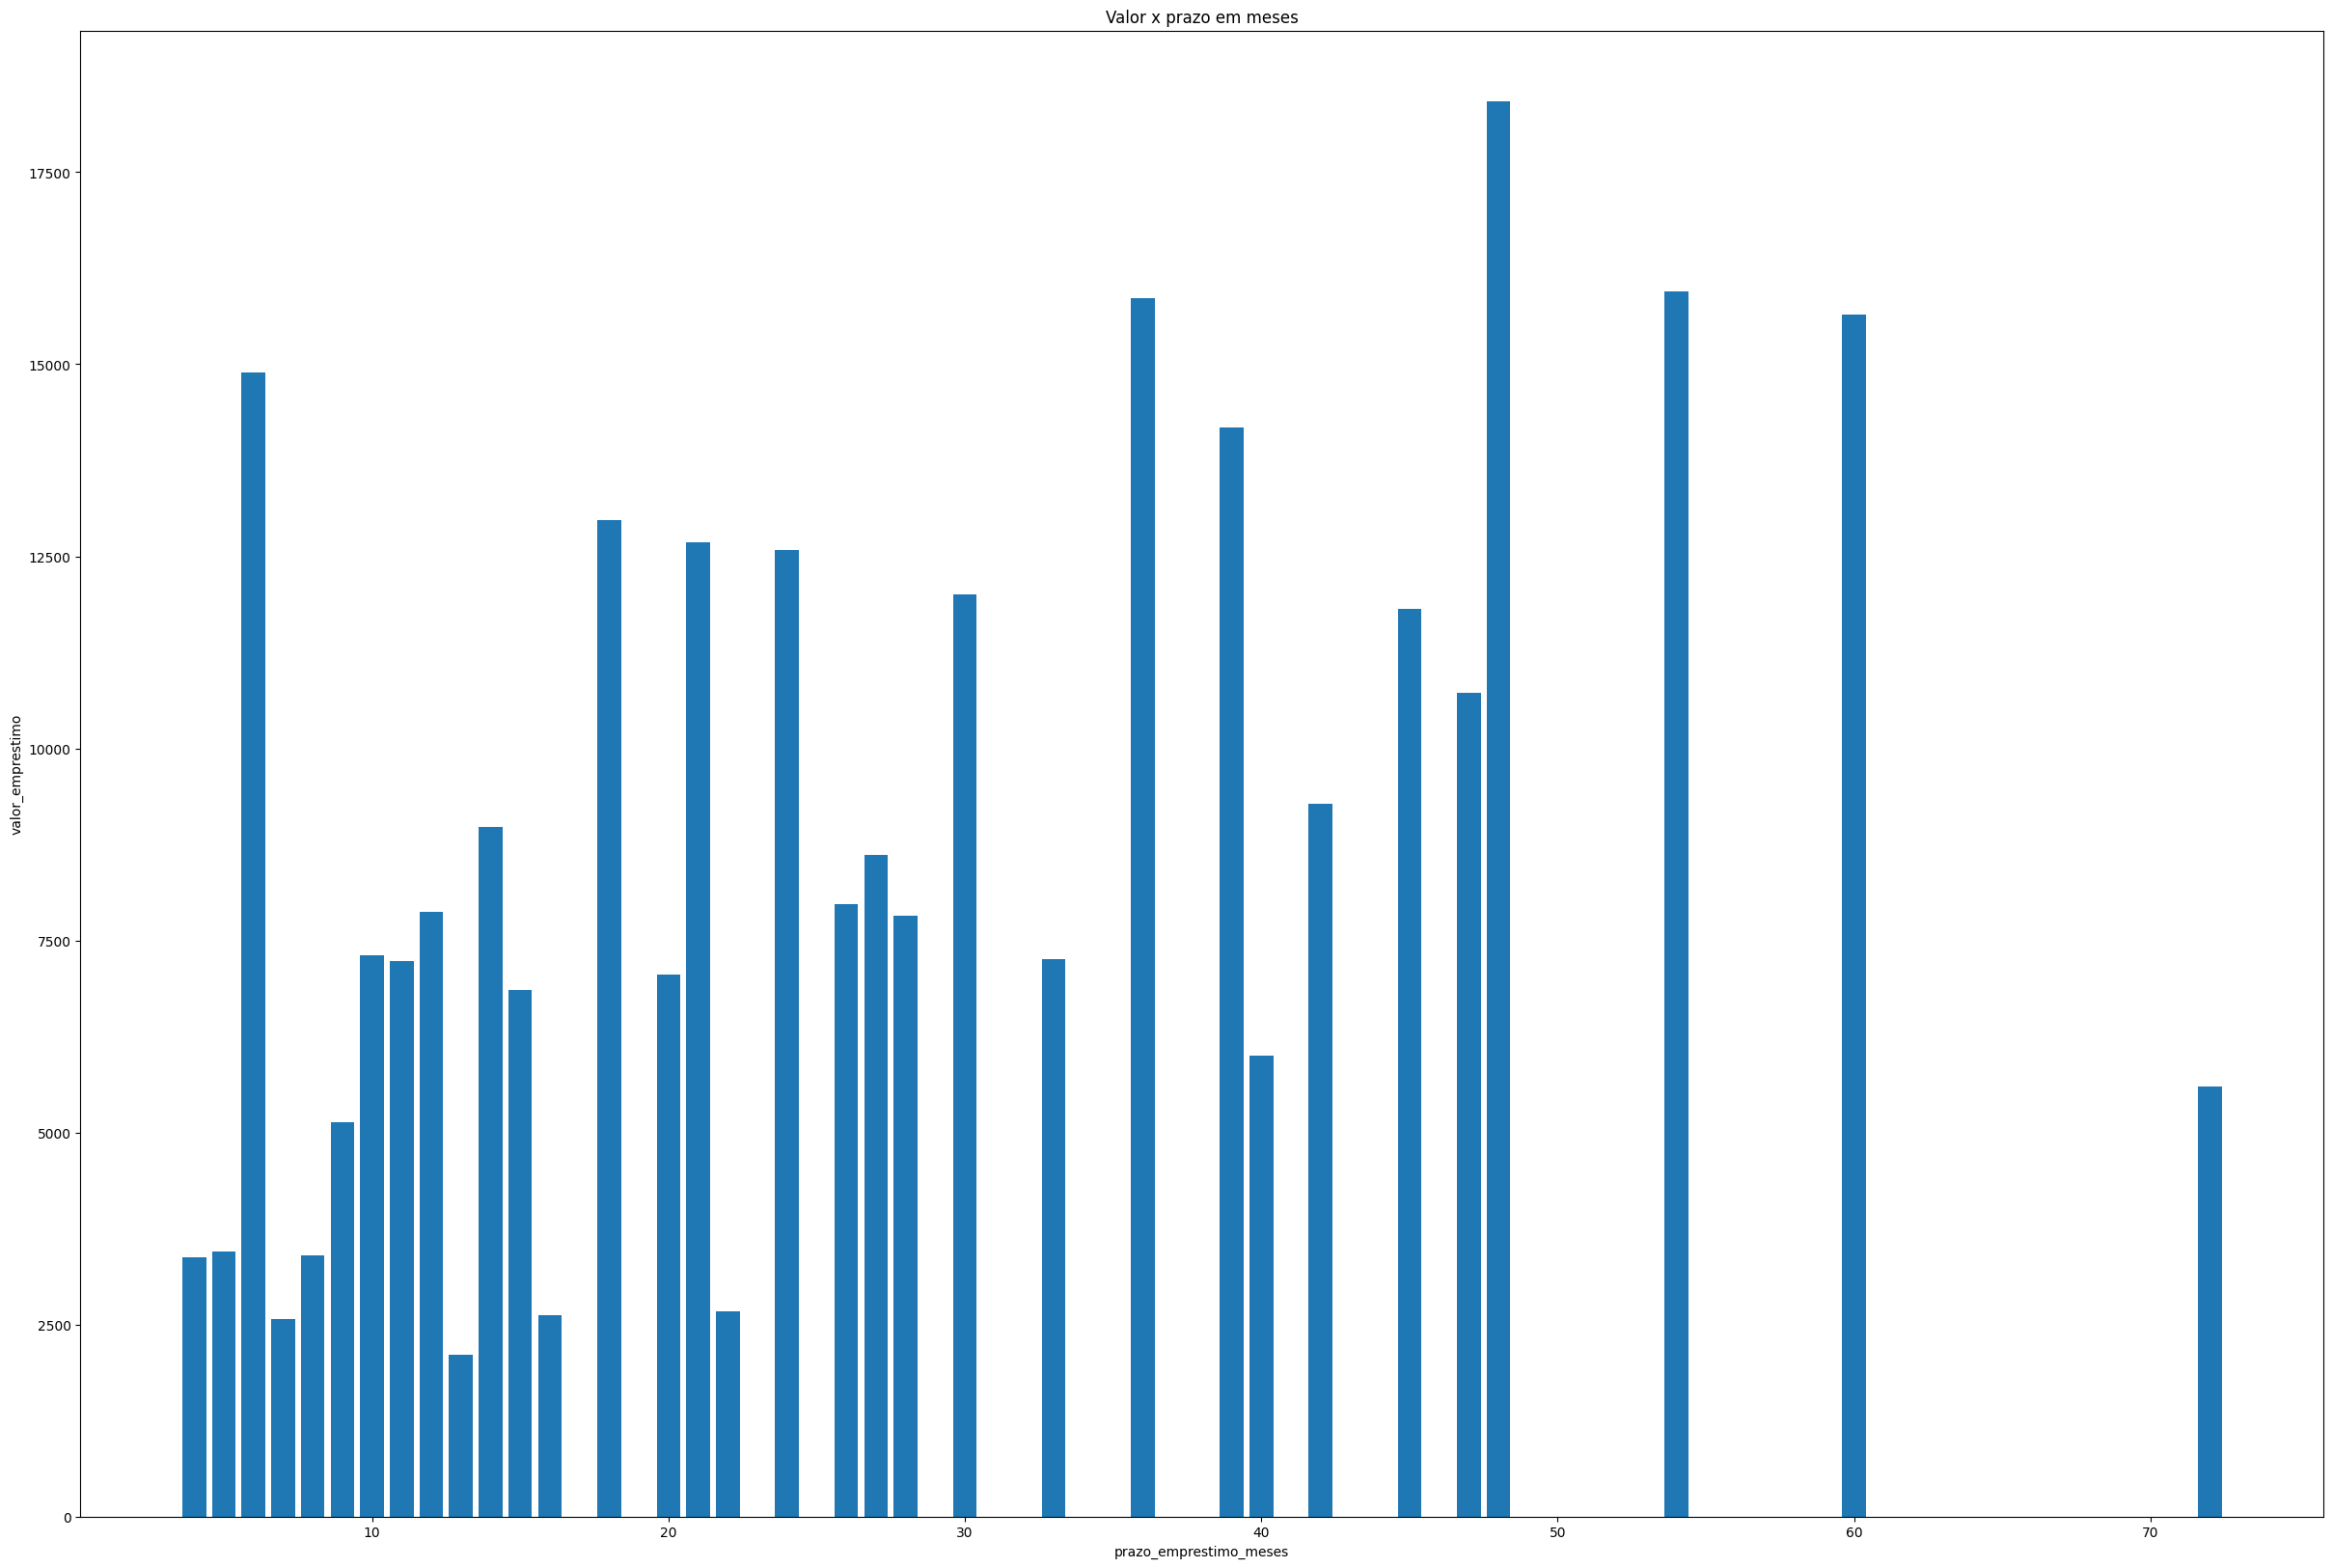

In [34]:
#criando gráfico de barras
plt.figure(figsize = (30,20))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)
plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor x prazo em meses')
plt.show()

# Comparação e escolha do modelo

## Separação de variáveis

In [36]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

#fazendo a separação
dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

#usando map
dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['est_civil'] = dados['sexo_est_civil'].map(dic_est_civil)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,est_civil
0,0,1,6,5,5,1169,1,1,4,3,...,67,3,2,2,3,1,1,1,0,1
1,1,2,48,3,5,5951,5,3,2,2,...,22,3,2,1,3,1,0,1,1,0
2,0,3,12,5,8,2096,5,2,2,3,...,49,3,2,1,2,2,0,1,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,45,3,3,1,3,2,0,1,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,53,3,3,2,3,2,0,1,0,1


##  Faixas de *classificação*

In [52]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

dados['faixa_idade'] = pd.cut(x = dados['idade'], bins = [18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,est_civil,faixa_idade
0,0,1,6,5,5,1169,1,1,4,3,...,3,2,2,3,1,1,1,0,1,5
1,1,2,48,3,5,5951,5,3,2,2,...,3,2,1,3,1,0,1,1,0,1
2,0,3,12,5,8,2096,5,2,2,3,...,3,2,1,2,2,0,1,0,1,3
3,0,1,42,3,4,7882,5,2,2,3,...,3,3,1,3,2,0,1,0,1,3
4,1,1,24,4,1,4870,5,3,3,3,...,3,3,2,3,2,0,1,0,1,4


In [55]:
#criando 'faixa_prazo_emprestimo' para variável 'prazo_emprestimo_meses'

## 01 - 12 = 1
## 13 - 24 = 2
## 24 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6

dados['faixa_prazo_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins = [1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,est_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,5,5,1169,1,1,4,3,...,2,2,3,1,1,1,0,1,5,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,3,1,0,1,1,0,1,4
2,0,3,12,5,8,2096,5,2,2,3,...,2,1,2,2,0,1,0,1,3,1
3,0,1,42,3,4,7882,5,2,2,3,...,3,1,3,2,0,1,0,1,3,4
4,1,1,24,4,1,4870,5,3,3,3,...,3,2,3,2,0,1,0,1,4,2


In [56]:
#criando 'faixa_valor_emprestimo' para variavel 'valor_emprestimo'

# 1 - 1000 = 1
# 1001 - 2000 = 2
# 2001 - 3000 = 3
# 3001 - 4000 = 4
# 4001 - 5000 = 5
# 5001 - 6000 = 6
# 6001 - 7000 = 7
# 7001 - 8000 = 8
# 8001 - 9000 = 9
# 9001 - 10000 = 10
# 10001 - 11000 = 11
# 11001 - 12000 = 12
# 12001 - 13000 = 13
# 13001 - 14000 = 14
# 14001 - 15000 = 15
# 15001 - 16000 = 16
# 16001 - 17000 = 17
# 17001 - 18000 = 18
# 18001 - 19000 = 19
# 19001 - 20000 = 20

dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000],
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,est_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,5,5,1169,1,1,4,3,...,2,3,1,1,1,0,1,5,1,2
1,1,2,48,3,5,5951,5,3,2,2,...,1,3,1,0,1,1,0,1,4,6
2,0,3,12,5,8,2096,5,2,2,3,...,1,2,2,0,1,0,1,3,1,3
3,0,1,42,3,4,7882,5,2,2,3,...,1,3,2,0,1,0,1,3,4,8
4,1,1,24,4,1,4870,5,3,3,3,...,2,3,2,0,1,0,1,4,2,5


A base de treino tem 700 elementos e a base de teste tem 300 elementos
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
/n Classification report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       214
           1       0.73      0.44      0.55        86

    accuracy                           0.79       300
   macro avg       0.77      0.69      0.71       300
weighted avg       0.78      0.79      0.78       300



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


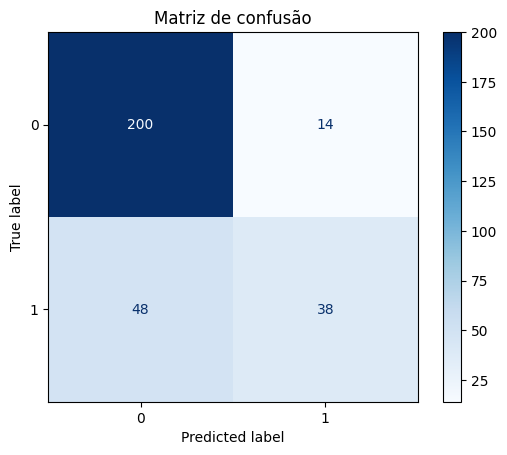

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
roc auc: 0.7864594653336232


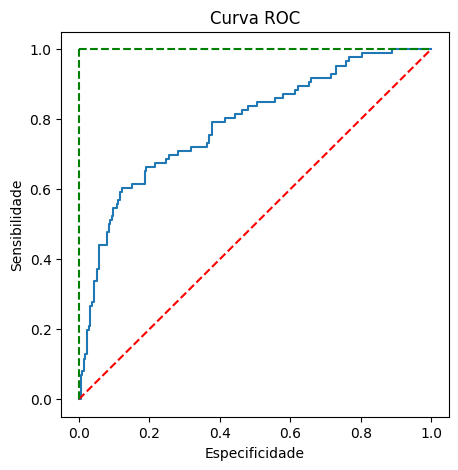

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7e21339e98a0>)

In [61]:
#chamando a função novamente
roda_modelo(base_dados, LogisticRegression(max_iter = 1000))

## Comparando métricas

Primeiro, fizemos a regressão teste:
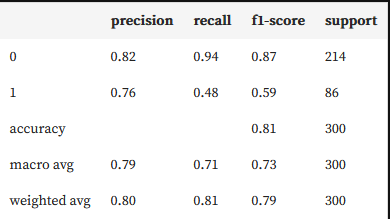

Essa regressão apresentou roc_auc 0.819441425777005

Depois temos a Regressão sem variáveis sexo e sexo_est_civil:
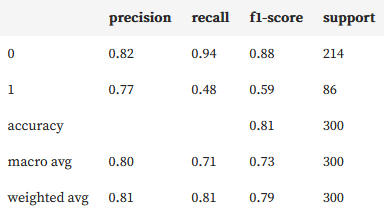

Com o roc_auc 0.8103129754401217. Nessa alteração nós mantivemos o recall, mantivemos o f1-score, aumentamos um pouco a precisão e perdemos um pouco na curva ROC.

Por último, fizemos a Regressão sem variáveis sexo e sexo_est_civil e variáveis absolutas: 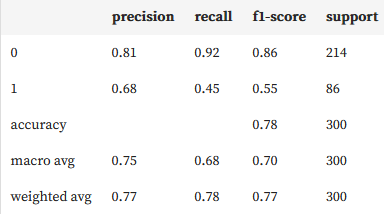

Com o roc_auc 0.7991197565746576. Comparando com o nosso segundo modelo, nós temos 77, 48 e 59. Agora temos 68, 45 e 55. Então, se formos parar para perceber, nós perdemos um pouco na precisão da categoria 1, mas ganhamos recall e f1-score. Nós também perdemos um pouco da curva ROC, bem pouco.

a escolha do modelo não é uma ciência exata, portanto vai depender de outros fatores, como o apetite de risco do ByteBank. Considerando que o nosso banco tem uma abordagem mais conservadores e não pretende assumir muitos riscos, podemos admitir o ultimo modelo como sendo o mais adequado.

## Melhor modelo

In [63]:
#nosso modelo
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()


,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,5,5,1,1,4,1,4,1,...,2,2,3,1,1,1,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,...,2,1,3,1,0,1,0,1,4,6
2,0,3,5,8,5,2,2,1,3,1,...,2,1,2,2,0,1,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,...,3,1,3,2,0,1,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,...,3,2,3,2,0,1,1,4,2,5


In [67]:
#treinar o modelo com a base inteiro

modelo = LogisticRegression(max_iter = 1000)

y= base_dados['default']
x = base_dados.drop(columns = 'default')
modelo.fit(x,y)

LogisticRegression(max_iter=1000)